<a href="https://colab.research.google.com/github/Ekaterina-Tolstova/Files/blob/main/Price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прайс предиктор

Шаг 1.
Импорт нужных библиотек.

In [852]:
import numpy as np
import pandas as pd

Шаг 2. Загрузка данных.

In [853]:
url_test = 'https://github.com/Ekaterina-Tolstova/Files/raw/main/test.csv' # сырые даные c GitHub
df_test = pd.read_csv(url_test)
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [854]:
url_train = 'https://github.com/Ekaterina-Tolstova/Files/blob/main/train.csv?raw=true'
df_train = pd.read_csv(url_train)
df_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


Таким образом, теперь есть два датафрейма:


*  df_test - тестовый датафрейм (только признаки)
*   df_train - тренировочный датафрейм (признаки и цены)



Шаг 3. Первичный анализ данных.

Общая информация о данных и основные статистики:

In [855]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [856]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [857]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [858]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570



Приведение типов.

In [859]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [860]:
df_train['Id'] = df_train['Id'].astype(str)
df_train['DistrictId'] = df_train['DistrictId'].astype(str)

Из общей информации видно, что параметры LifeSquare и Healthcare_1 доступны не для всех ID. В тех ID, для которых пропущены значения параметров LifeSquare и Healthcare_1, пропущенные ячейки будут заполнены средними по соответствующим выборкам. 

Далее обработка ***параметров с неправдоподобными значениями***.

**Параметр Rooms.**

In [861]:
%matplotlib inline

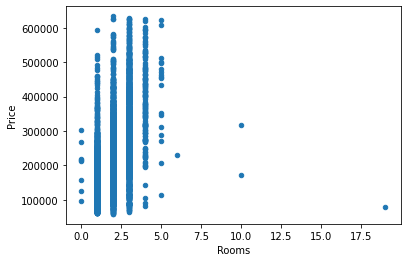

In [862]:
df_train.plot.scatter(x="Rooms", y="Price")

Из графика видно, что значения параметра Rooms более 5 образуют группу выбросов. Поэтому значения более 5 будут заменены на моду. Значения параметра Rooms равные 0 будут также заменены на моду.

Определяем моду значений параметра Rooms.

In [863]:
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Видно, что наиболее часто встречается значение 2 (мода), на него и будут заменены выбросы и значения 0.

In [864]:
df_train['Rooms'] = np.where((df_train.Rooms == 0), 2, df_train.Rooms)
df_train['Rooms'] = np.where((df_train.Rooms > 5), 2, df_train.Rooms)

Проверка получившихся значений.

In [865]:
df_train['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

**Параметр Square.**

Повтор шагов параметра Rooms.

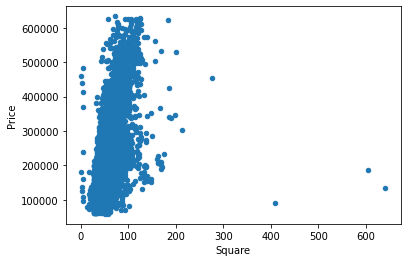

In [866]:
df_train.plot.scatter(x="Square", y="Price")

Видно, что значения меньше 10 и больше 150 образуют выбросы. Будут заменены на среднее значение (взято из общей информации).

In [867]:

df_train.loc[df_train.Square > 150, 'Square'] = 56.3
df_train.loc[df_train.Square < 10, 'Square'] = 56.3


Проверка

In [868]:
df_train['Square'][df_train['Square'] < 10]
df_train['Square'][df_train['Square'] > 150]

Series([], Name: Square, dtype: float64)

**Параметр KitchenSquare**

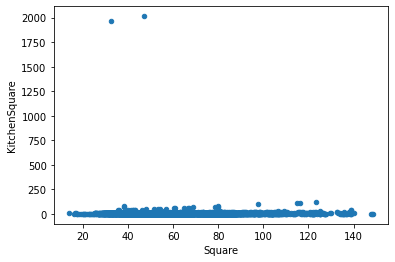

In [869]:
df_train.plot.scatter(x="Square", y="KitchenSquare")

Видно, что значения более 1800 выбросные, будут заменены на 50 квантиль

In [870]:
df_train.loc[df_train.KitchenSquare > 1800, 'KitchenSquare'] = 6

Повторное построение графика с учетом замещенных данных

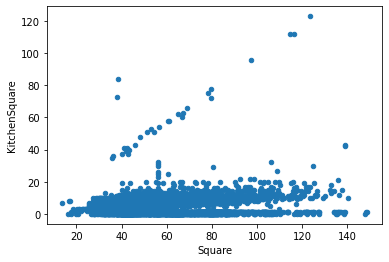

In [871]:
df_train.plot.scatter(x="Square", y="KitchenSquare")

Видно, что значения площади кухни больше общей площади - явный выброс; также нереалистично выглядят данные, где площадь кухни равна общей площади. Те и другие будут заменены на долю кухни, рассчитанную согласно СП 54.13330.2016 Здания жилые многоквартирные, для минимальной площади 1-комнатной квартиры 28 кв.м, а кухни 5 кв.м., т.е. 17.86% (для простоты 18%, или коэффициент 0,18).  

In [872]:
df_train.loc[df_train.KitchenSquare >= df_train.Square * 0.7, 'KitchenSquare'] = df_train.Square * 0.18

Проверка с построением графика

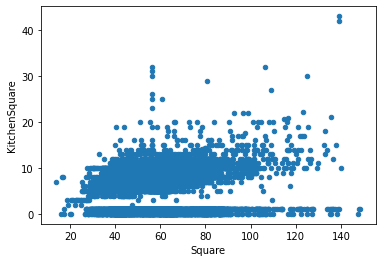

In [873]:
df_train.plot.scatter(x="Square", y="KitchenSquare")

Теперь сравним площадь кухни и цену квартиры

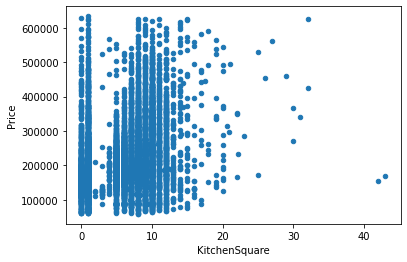

In [874]:
df_train.plot.scatter(x='KitchenSquare', y='Price')

Пока оставим так, но, согласно https://realty.ria.ru/20161021/408063677.html, площадь кухни сильно влияет на цену квартиры.

In [ ]:
Из графика видно, что при площади кухни от 5 до 10 кв.м. отмечается сильная 

**Параметр** **LifeSquare**

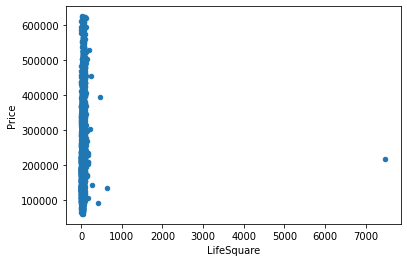

In [875]:
df_train.plot.scatter(x="LifeSquare", y="Price")

Явный выброс более 7000 будет заменен на 50 квантиль

In [876]:
df_train.loc[df_train.LifeSquare > 7000, 'LifeSquare'] = 32.78

Повторное построение графика

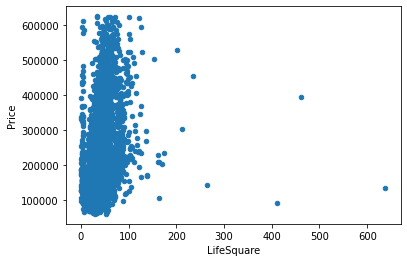

In [877]:
df_train.plot.scatter(x="LifeSquare", y="Price")

Еще раз вместо выбросов более 190 подстановка 50 квантиля

In [878]:
df_train.loc[df_train.LifeSquare > 190, 'LifeSquare'] = 32.78

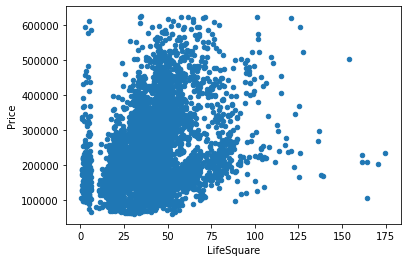

In [879]:
df_train.plot.scatter(x="LifeSquare", y="Price")

Пропуски в столбце LifeSquare будут заполнены согласно верхней границе рекомендованного планировочного коэффициента (0,7).

In [880]:
condition = df_train['LifeSquare'].isna()
df_train.loc[condition, 'LifeSquare'] = df_train.Square * 0.7

In [881]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

График

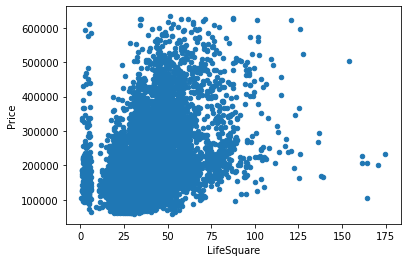

In [882]:
df_train.plot.scatter(x="LifeSquare", y="Price")

**Параметры HouseFloor, Floor**

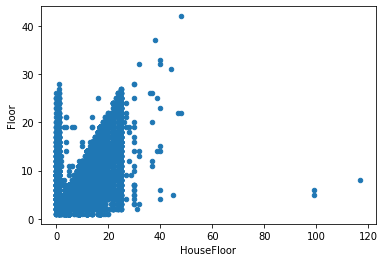

In [883]:
df_train.plot.scatter(x="HouseFloor", y="Floor")

Из графика видно, что параметр Floor иногда больше HouseFloor. Подстановка рандомных значений номера этажа.

In [884]:
import random

In [885]:
floor_outliers = df_train.loc[df_train['Floor'] > df_train['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   24,   25,   26,   33,   34,   37,   39,
            ...
            9931, 9938, 9940, 9950, 9953, 9960, 9968, 9970, 9975, 9996],
           dtype='int64', length=1825)

In [886]:
df_train.loc[floor_outliers, 'Floor'] = df_train.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(0, x))

Проверка, все ли значения на месте

In [887]:
df_train.Floor.shape

(10000,)

Проверка на графике

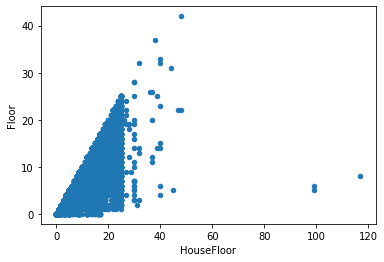

In [888]:
df_train.plot.scatter(x="HouseFloor", y="Floor")

In [889]:
df_train['Floor'].value_counts()

3     940
4     913
5     859
2     669
7     656
8     649
0     637
6     634
1     602
9     578
10    420
12    415
11    365
13    311
14    308
16    251
15    248
17    208
18     65
19     56
20     53
22     45
21     43
24     30
23     19
25     16
26      2
28      2
32      2
33      1
37      1
42      1
31      1
Name: Floor, dtype: int64

**Параметр HouseYear**

In [890]:
df_train['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

Замена значений - выбросов на значение 2020

In [891]:
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

Проверка этажности зданий

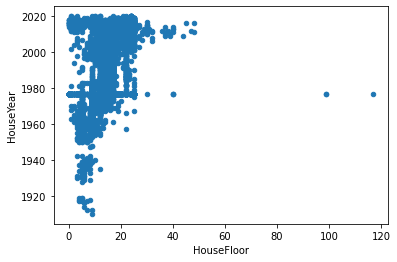

In [892]:
df_train.plot.scatter(x="HouseFloor", y="HouseYear")

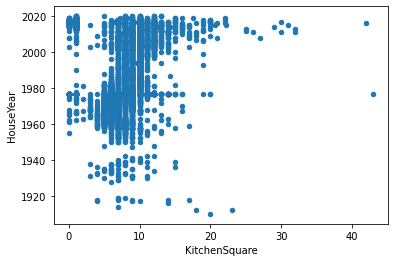

In [927]:
df_train.plot.scatter(x="KitchenSquare", y="HouseYear")

Согласно данным из Википедии, в Москве нет зданий с этажностью более 95, и 95-этажное здание - деловой центр. Поэтому значения около 100 и 120 заменяются на 50 квантиль по статистике.

In [893]:
df_train.loc[df_train.HouseFloor > 80, 'HouseFloor'] = 12

**Параметр Healthcare_1**

Будет удален, т.к. нет данных для его интерпретации и принятии решения о способе замены пропусков значений.

In [894]:
df_train.drop('Healthcare_1', axis=1, inplace=True)

**Шаг 4. Построение новых признаков.**

Перевод бинарных значений в числовые.

In [895]:
binary_to_numbers = {'A': 0, 'B': 1}

df_train['Ecology_2'] = df_train['Ecology_2'].replace(binary_to_numbers)
df_train['Ecology_3'] = df_train['Ecology_3'].replace(binary_to_numbers)
df_train['Shops_2'] = df_train['Shops_2'].replace(binary_to_numbers)

Просчитаем корреляции

In [896]:
df_train.corr()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Rooms,1.000000,0.777163,0.616893,0.137246,-0.011461,-0.033513,-0.043799,-0.030731,-0.002296,-0.006552,0.076405,0.071335,0.014031,0.063121,0.053238,-0.000928,0.571638
Square,0.777163,1.000000,0.769843,0.100597,0.079832,0.102148,0.194445,-0.067128,0.032825,0.030482,-0.079792,-0.050445,0.017166,-0.038627,0.007446,-0.061537,0.592032
LifeSquare,0.616893,0.769843,1.000000,-0.088453,0.051398,0.054930,0.148186,-0.073028,0.030783,0.046502,-0.170056,-0.138665,0.040091,-0.088052,-0.017563,-0.063469,0.397170
KitchenSquare,0.137246,0.100597,-0.088453,1.000000,0.124780,0.177748,0.171416,0.027234,-0.011531,-0.079215,0.371998,0.337524,-0.067730,0.211307,0.109420,0.040030,0.312905
Floor,-0.011461,0.079832,0.051398,0.124780,1.000000,0.680229,0.266606,0.006547,0.036305,0.009965,0.001822,0.018438,-0.007646,-0.032547,0.026506,0.046655,0.101424
HouseFloor,-0.033513,0.102148,0.054930,0.177748,0.680229,1.000000,0.406087,-0.002775,0.060671,0.008817,-0.019104,0.008913,-0.016773,-0.073747,0.021223,0.051229,0.089409
HouseYear,-0.043799,0.194445,0.148186,0.171416,0.266606,0.406087,1.000000,-0.065987,0.076826,0.047215,-0.047870,0.013629,-0.049274,-0.115552,-0.001892,-0.058704,0.036735
Ecology_1,-0.030731,-0.067128,-0.073028,0.027234,0.006547,-0.002775,-0.065987,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,0.030873,-0.076749,0.079809,-0.058381
Ecology_2,-0.002296,0.032825,0.030783,-0.011531,0.036305,0.060671,0.076826,-0.110725,1.000000,-0.016643,-0.066017,-0.012709,0.008512,-0.082667,0.051892,0.022242,0.022379
Ecology_3,-0.006552,0.030482,0.046502,-0.079215,0.009965,0.008817,0.047215,-0.223197,-0.016643,1.000000,-0.037777,0.007394,0.014595,-0.133120,0.001859,-0.050425,-0.052585


Из таблицы корреляций видно, что цена максимально коррелирует с количеством комнат и показателями площади, затем идут район, социальные показатели, здравоохранение и магазины.

***Округ.***

Создание параметра, характеризующего количество предложений в данном округе (допущение: количество предложений растет с размером округа, значит, этот параметр будет отражать также площадь округа).

In [897]:
district_size = df_train['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [898]:
df_train = df_train.merge(district_size, on='DistrictId', how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,11809,27,3.0,115.027311,80.519117,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,652
3,2352,1,1.0,40.409907,28.286935,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,89


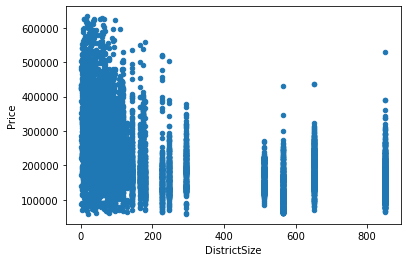

In [899]:
df_train.plot.scatter(x="DistrictSize", y="Price")

In [900]:
df_train.corr()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
Rooms,1.000000,0.777163,0.616893,0.137246,-0.011461,-0.033513,-0.043799,-0.030731,-0.002296,-0.006552,0.076405,0.071335,0.014031,0.063121,0.053238,-0.000928,0.571638,-0.099172
Square,0.777163,1.000000,0.769843,0.100597,0.079832,0.102148,0.194445,-0.067128,0.032825,0.030482,-0.079792,-0.050445,0.017166,-0.038627,0.007446,-0.061537,0.592032,0.064616
LifeSquare,0.616893,0.769843,1.000000,-0.088453,0.051398,0.054930,0.148186,-0.073028,0.030783,0.046502,-0.170056,-0.138665,0.040091,-0.088052,-0.017563,-0.063469,0.397170,0.152778
KitchenSquare,0.137246,0.100597,-0.088453,1.000000,0.124780,0.177748,0.171416,0.027234,-0.011531,-0.079215,0.371998,0.337524,-0.067730,0.211307,0.109420,0.040030,0.312905,-0.365814
Floor,-0.011461,0.079832,0.051398,0.124780,1.000000,0.680229,0.266606,0.006547,0.036305,0.009965,0.001822,0.018438,-0.007646,-0.032547,0.026506,0.046655,0.101424,0.045554
HouseFloor,-0.033513,0.102148,0.054930,0.177748,0.680229,1.000000,0.406087,-0.002775,0.060671,0.008817,-0.019104,0.008913,-0.016773,-0.073747,0.021223,0.051229,0.089409,0.091040
HouseYear,-0.043799,0.194445,0.148186,0.171416,0.266606,0.406087,1.000000,-0.065987,0.076826,0.047215,-0.047870,0.013629,-0.049274,-0.115552,-0.001892,-0.058704,0.036735,0.201515
Ecology_1,-0.030731,-0.067128,-0.073028,0.027234,0.006547,-0.002775,-0.065987,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,0.030873,-0.076749,0.079809,-0.058381,-0.172966
Ecology_2,-0.002296,0.032825,0.030783,-0.011531,0.036305,0.060671,0.076826,-0.110725,1.000000,-0.016643,-0.066017,-0.012709,0.008512,-0.082667,0.051892,0.022242,0.022379,0.054421
Ecology_3,-0.006552,0.030482,0.046502,-0.079215,0.009965,0.008817,0.047215,-0.223197,-0.016643,1.000000,-0.037777,0.007394,0.014595,-0.133120,0.001859,-0.050425,-0.052585,0.106924


***Средняя цена по округу***

In [901]:
# med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
#                             .rename(columns={'Price':'MedPriceByDistrict'})

# med_price_by_district.head()

In [902]:
med_price_by_district = df_train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [903]:
df_train = df_train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,MedPriceByDistrict
0,11809,27,3.0,115.027311,80.519117,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,851,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,78,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,652,244005.272380
3,2352,1,1.0,40.409907,28.286935,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,652,146735.671740
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,89,201584.441255


Общее представление о годах постройки домов

In [904]:
import matplotlib.pyplot as plt


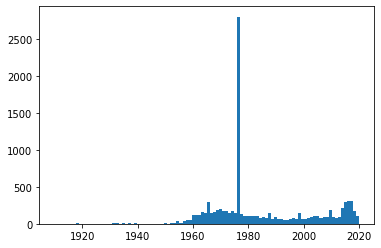

In [905]:
year_hist = plt.hist(df_train.HouseYear, bins=100)

***Категории по году и этажу***

In [906]:
# def floor_to_cat(X):

#     X['floor_cat'] = 0

#     X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
#     X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
#     X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
#     X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
#     X.loc[X['Floor'] > 15, 'floor_cat'] = 5

#     return X


# def floor_to_cat_pandas(X):
#     bins = [0, 3, 5, 9, 15, X['Floor'].max()]
#     X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
#     X['floor_cat'].fillna(-1, inplace=True)
#     return X


# def year_to_cat(X):

#     X['year_cat'] = 0

#     X.loc[X['HouseYear'] <= 1936, 'year_cat'] = 1
#     X.loc[(X['HouseYear'] > 1936) & (X['HouseYear'] <= 1957), 'year_cat'] = 2
#     X.loc[(X['HouseYear'] > 1957) & (X['HouseYear'] <= 1990), 'year_cat'] = 3
#     X.loc[(X['HouseYear'] > 1990) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
#     X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2020), 'year_cat'] = 5
#     # X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

#     return X


# def year_to_cat_pandas(X):
#     bins = [0, 1936, 1957, 1990, 2000, X['HouseYear'].max()]
#     X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
#     X['year_cat'].fillna(-1, inplace=True)
#     return X

In [907]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[(X['Floor'] <= 2), 'floor_cat'] = 1  
    X.loc[(X['Floor'] == 25), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 2) & (X['Floor'] <= 24), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 25) & (X['Floor'] <= 42), 'floor_cat'] = 4
    # X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [0, 2, 24, 25, 42]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1936, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1936) & (X['HouseYear'] <= 1957), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1957) & (X['HouseYear'] <= 1990), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1990) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2020), 'year_cat'] = 5
    # X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [0, 1936, 1957, 1990, 2000, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [908]:
bins = [0, 2, 24, 25, df_train['Floor'].max()]
pd.cut(df_train['Floor'], bins=bins, labels=False)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    NaN
9997    1.0
9998    1.0
9999    1.0
Name: Floor, Length: 10000, dtype: float64

In [909]:
bins = [0, 2, 24, 25, df_train['Floor'].max()]
pd.cut(df_train['Floor'], bins=bins)

0       (2.0, 24.0]
1       (2.0, 24.0]
2        (0.0, 2.0]
3       (2.0, 24.0]
4       (2.0, 24.0]
           ...     
9995    (2.0, 24.0]
9996            NaN
9997    (2.0, 24.0]
9998    (2.0, 24.0]
9999    (2.0, 24.0]
Name: Floor, Length: 10000, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 24] < (24, 25] < (25, 42]]

In [910]:
df_train = year_to_cat(df_train)
df_train = floor_to_cat(df_train)
df_train.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,MedPriceByDistrict,year_cat,floor_cat
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,119367.455796,118,232514.855623,3,3
9996,16265,27,2.0,64.307684,37.038420,9.0,0,0.0,1977,0.072158,1,1,2,629,1,0,0,0,199715.148807,851,165700.355193,3,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,165953.912580,7,165953.912580,3,3
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,171842.411855,165,153921.400690,3,3
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,1,1,43,8429,3,3,9,1,177685.627486,89,158830.639873,3,3


In [911]:
# med_price_by_floor_year = df_train.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
#                                             rename(columns={'Price':'MedPriceByFloorYear'})
# med_price_by_floor_year.head()

In [912]:
# df_train = df_train.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
# df_train.head()

In [913]:
feature_names = df_train.columns.values.tolist()
feature_names

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat']

In [914]:
feature_names_without_price = ['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'DistrictSize',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat']
df_train_for_test = df_train[feature_names_without_price]
df_train_for_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,MedPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027311,80.519117,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,851,213530.788443,5,3
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,78,146032.829834,3,3
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,652,244005.272380,3,1
3,2352,1,1.0,40.409907,28.286935,1.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,652,146735.671740,3,3
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,89,201584.441255,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,118,232514.855623,3,3
9996,16265,27,2.0,64.307684,37.038420,9.0,0,0.0,1977,0.072158,1,1,2,629,1,0,0,0,851,165700.355193,3,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,7,165953.912580,3,3
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,165,153921.400690,3,3


In [915]:
df_train.corr()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,MedPriceByDistrict,year_cat,floor_cat
Rooms,1.000000,0.777163,0.616893,0.137246,-0.011461,-0.033513,-0.043799,-0.030731,-0.002296,-0.006552,0.076405,0.071335,0.014031,0.063121,0.053238,-0.000928,0.571638,-0.099172,0.697980,-0.032641,-0.006819
Square,0.777163,1.000000,0.769843,0.100597,0.079832,0.102148,0.194445,-0.067128,0.032825,0.030482,-0.079792,-0.050445,0.017166,-0.038627,0.007446,-0.061537,0.592032,0.064616,0.544382,0.161804,-0.042716
LifeSquare,0.616893,0.769843,1.000000,-0.088453,0.051398,0.054930,0.148186,-0.073028,0.030783,0.046502,-0.170056,-0.138665,0.040091,-0.088052,-0.017563,-0.063469,0.397170,0.152778,0.384860,0.110273,-0.047267
KitchenSquare,0.137246,0.100597,-0.088453,1.000000,0.124780,0.177748,0.171416,0.027234,-0.011531,-0.079215,0.371998,0.337524,-0.067730,0.211307,0.109420,0.040030,0.312905,-0.365814,0.280216,0.225621,0.204639
Floor,-0.011461,0.079832,0.051398,0.124780,1.000000,0.680229,0.266606,0.006547,0.036305,0.009965,0.001822,0.018438,-0.007646,-0.032547,0.026506,0.046655,0.101424,0.045554,0.010758,0.216335,0.568537
HouseFloor,-0.033513,0.102148,0.054930,0.177748,0.680229,1.000000,0.406087,-0.002775,0.060671,0.008817,-0.019104,0.008913,-0.016773,-0.073747,0.021223,0.051229,0.089409,0.091040,-0.012603,0.329150,0.513932
HouseYear,-0.043799,0.194445,0.148186,0.171416,0.266606,0.406087,1.000000,-0.065987,0.076826,0.047215,-0.047870,0.013629,-0.049274,-0.115552,-0.001892,-0.058704,0.036735,0.201515,-0.074416,0.938689,0.104037
Ecology_1,-0.030731,-0.067128,-0.073028,0.027234,0.006547,-0.002775,-0.065987,1.000000,-0.110725,-0.223197,0.026464,0.009264,-0.124068,0.030873,-0.076749,0.079809,-0.058381,-0.172966,-0.059668,-0.045008,0.038261
Ecology_2,-0.002296,0.032825,0.030783,-0.011531,0.036305,0.060671,0.076826,-0.110725,1.000000,-0.016643,-0.066017,-0.012709,0.008512,-0.082667,0.051892,0.022242,0.022379,0.054421,0.024917,0.050251,-0.016944
Ecology_3,-0.006552,0.030482,0.046502,-0.079215,0.009965,0.008817,0.047215,-0.223197,-0.016643,1.000000,-0.037777,0.007394,0.014595,-0.133120,0.001859,-0.050425,-0.052585,0.106924,-0.058688,0.025361,-0.005519


**Разбиение на train и test**

In [916]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_auc_score

In [917]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [918]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [919]:
target_name = 'Price'

In [920]:
df_train.drop('Id', axis=1, inplace=True)
df_train.drop('DistrictId', axis=1, inplace=True)

In [921]:
X = df_train.drop(columns=target_name)
y = df_train[target_name]

In [922]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

**Построение модели**

In [923]:

rf_model = RandomForestRegressor(random_state=21, criterion='squared_error')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.96
Test R2:	0.746


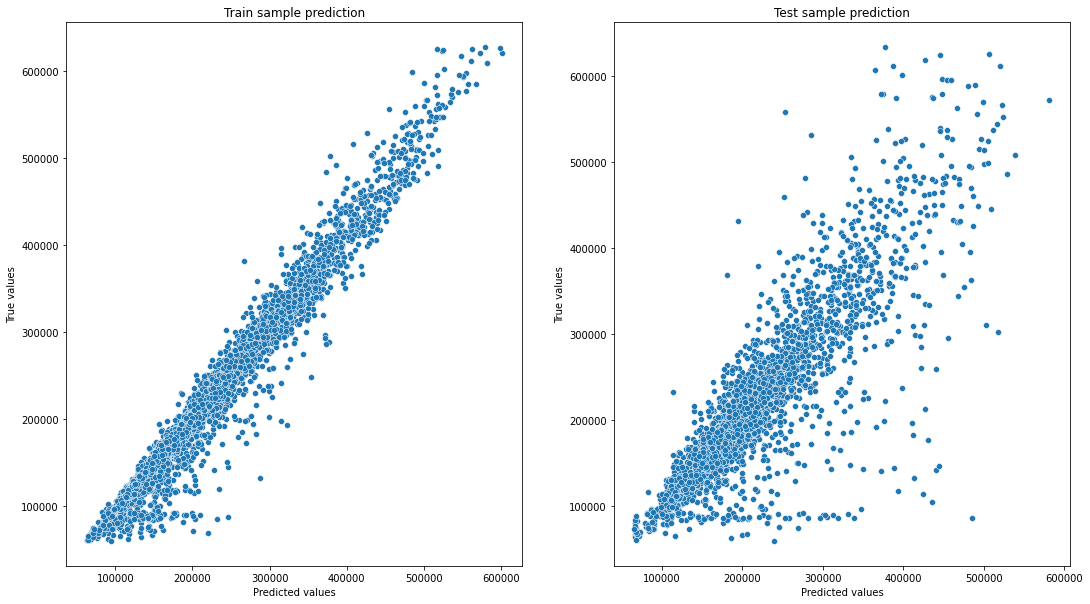

In [924]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [925]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.72910027, 0.66020631, 0.7219877 ])

In [926]:
cv_score.mean()

0.7037647609342924

In [731]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
17,MedPriceByDistrict,0.632949
1,Square,0.116611
2,LifeSquare,0.034463
6,HouseYear,0.026879
3,KitchenSquare,0.025863
16,DistrictSize,0.024801
12,Social_3,0.022489
4,Floor,0.020643
5,HouseFloor,0.020415
7,Ecology_1,0.016480


**Работа с тестовым датасетом**

***Обработка признаков***

Общая информация о данных и основные статистики:

In [732]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [733]:
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000



Приведение типов.

In [734]:
df_test.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [735]:
df_test['Id'] = df_test['Id'].astype(str)
df_test['DistrictId'] = df_test['DistrictId'].astype(str)

In [736]:
%matplotlib inline

In [737]:
df_test['Rooms'] = np.where((df_test.Rooms == 0), 2, df_test.Rooms)
df_test['Rooms'] = np.where((df_test.Rooms > 5), 2, df_test.Rooms)

In [738]:
df_test['Rooms'].value_counts()

2.0    2035
1.0    1769
3.0    1099
4.0      90
5.0       7
Name: Rooms, dtype: int64

In [739]:

df_test.loc[df_test.Square > 150, 'Square'] = 56.3
df_test.loc[df_test.Square < 10, 'Square'] = 56.3


In [740]:
df_test.loc[df_test.KitchenSquare > 1800, 'KitchenSquare'] = 6

In [741]:
df_test.loc[df_test.KitchenSquare >= df_test.Square * 0.7, 'KitchenSquare'] = df_test.Square * 0.18

In [742]:
df_test.loc[df_test.LifeSquare > 7000, 'LifeSquare'] = 32.78

In [743]:
df_test.loc[df_test.LifeSquare > 190, 'LifeSquare'] = 32.78

In [744]:
condition = df_test['LifeSquare'].isna()
df_test.loc[condition, 'LifeSquare'] = df_test.Square * 0.7

In [745]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [746]:
import random

In [747]:
floor_outliers = df_test.loc[df_test['Floor'] > df_test['HouseFloor']].index
floor_outliers

Int64Index([  11,   12,   14,   21,   22,   25,   26,   42,   46,   47,
            ...
            4951, 4952, 4960, 4971, 4973, 4976, 4978, 4980, 4982, 4995],
           dtype='int64', length=884)

In [748]:
df_test.loc[floor_outliers, 'Floor'] = df_test.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(0, x))

In [749]:
df_test['HouseYear'].sort_values(ascending=False)

3959    2020
4628    2020
1661    2020
4416    2020
3016    2020
        ... 
4836    1912
4046    1911
2990    1910
3166    1909
1929    1908
Name: HouseYear, Length: 5000, dtype: int64

In [750]:
df_test.loc[df_test.HouseFloor > 80, 'HouseFloor'] = 12

In [751]:
df_test.drop('Healthcare_1', axis=1, inplace=True)

In [752]:
binary_to_numbers = {'A': 0, 'B': 1}

df_test['Ecology_2'] = df_test['Ecology_2'].replace(binary_to_numbers)
df_test['Ecology_3'] = df_test['Ecology_3'].replace(binary_to_numbers)
df_test['Shops_2'] = df_test['Shops_2'].replace(binary_to_numbers)

In [753]:
district_size = df_test['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [754]:
df_test = df_test.merge(district_size, on='DistrictId', how='left')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,46
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,122
2,960,27,2.0,59.463678,41.624575,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,391
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,264
4,746,74,1.0,53.837056,37.685939,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,61


Добавление квази-столбца цены

In [755]:
url_pseudo_price = 'https://github.com/Ekaterina-Tolstova/Files/raw/main/pseudo_price_3_med_192305.csv'
df_pseudo_price = pd.read_csv(url_pseudo_price)
df_pseudo_price

,Price
0,254998.542410
1,203058.075211
2,167848.876431
3,173737.299815
4,147636.760356
...,...
4995,287236.137377
4996,171744.315451
4997,205635.009743
4998,135253.303254


In [756]:
df_test.loc[df_test['DistrictSize'].notnull(), 'Price'] = df_pseudo_price['Price']


In [757]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,Price
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,46,254998.542410
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,122,203058.075211
2,960,27,2.0,59.463678,41.624575,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,391,167848.876431
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,264,173737.299815
4,746,74,1.0,53.837056,37.685939,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,61,147636.760356


In [758]:
df_test.shape

(5000, 20)

***Средняя цена по округу***

In [759]:
med_price_by_district = df_test.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,196308.283419
1,0,2.0,208993.952316
2,0,3.0,127276.643909
3,0,4.0,119080.608078
4,1,1.0,191091.968972


In [760]:
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,Price
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,46,254998.542410
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,122,203058.075211
2,960,27,2.0,59.463678,41.624575,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,391,167848.876431
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,264,173737.299815
4,746,74,1.0,53.837056,37.685939,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,61,147636.760356


In [761]:
df_test = df_test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,Price,MedPriceByDistrict
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,46,254998.542410,197979.104707
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,122,203058.075211,204630.529357
2,960,27,2.0,59.463678,41.624575,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,391,167848.876431,190510.694424
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,264,173737.299815,185996.051223
4,746,74,1.0,53.837056,37.685939,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,61,147636.760356,207698.557977


**ВНИМАНИЕ!!!**

***Средняя цена по году и этажу***

In [762]:
def floor_to_cat(X):

    X['floor_cat'] = 0

    X.loc[(X['Floor'] <= 2), 'floor_cat'] = 1  
    X.loc[(X['Floor'] == 25), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 2) & (X['Floor'] <= 24), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 25) & (X['Floor'] <= 42), 'floor_cat'] = 4
    # X.loc[X['Floor'] > 15, 'floor_cat'] = 5

    return X


def floor_to_cat_pandas(X):
    bins = [0, 2, 24, 25, 42]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):

    X['year_cat'] = 0

    X.loc[X['HouseYear'] <= 1936, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1936) & (X['HouseYear'] <= 1957), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1957) & (X['HouseYear'] <= 1990), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1990) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2020), 'year_cat'] = 5
    # X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6

    return X


def year_to_cat_pandas(X):
    bins = [0, 1936, 1957, 1990, 2000, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [763]:
bins = [0, 2, 24, 25, df_test['Floor'].max()]
pd.cut(df_test['Floor'], bins=bins, labels=False)

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
4995    1.0
4996    1.0
4997    0.0
4998    1.0
4999    1.0
Name: Floor, Length: 5000, dtype: float64

In [764]:
bins = [0, 2, 24, 25, df_test['Floor'].max()]
pd.cut(df_test['Floor'], bins=bins)

0       (2, 24]
1       (2, 24]
2       (2, 24]
3        (0, 2]
4       (2, 24]
         ...   
4995    (2, 24]
4996    (2, 24]
4997     (0, 2]
4998    (2, 24]
4999    (2, 24]
Name: Floor, Length: 5000, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 24] < (24, 25] < (25, 46]]

In [765]:
df_test = year_to_cat(df_test)
df_test = floor_to_cat(df_test)
df_test.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,Price,MedPriceByDistrict,year_cat,floor_cat
4995,10379,29,2.0,43.177521,30.339945,5.0,3,5.0,1962,0.069660,1,1,31,6119,4,1,2,1,60,287236.137377,182373.324831,3,3
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,0,7,1,16,171744.315451,174561.245235,5,3
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,2,5,1,46,205635.009743,205679.064170,3,1
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,0,11,1,16,135253.303254,202187.610807,3,3
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,1,1,47,8004,3,3,5,1,70,215864.310410,201788.710872,5,3


In [766]:
df_test = df_test.reindex(columns=feature_names_without_price)
df_test.head(20)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,MedPriceByDistrict,year_cat,floor_cat
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1,1,1,46,197979.104707,3,3
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,1,1,2,629,1,0,0,0,122,204630.529357,5,3
2,960,27,2.0,59.463678,41.624575,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,0,1,1,391,190510.694424,3,3
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,0,0,1,264,185996.051223,3,1
4,746,74,1.0,53.837056,37.685939,1.0,8,17.0,1977,0.309479,1,1,35,7715,4,0,6,1,61,207698.557977,3,3
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,1,1,15,2787,2,0,7,1,16,174561.245235,5,3
6,672,62,1.0,46.269456,22.820239,11.0,8,17.0,2014,0.072158,1,1,2,629,1,0,0,0,122,204630.529357,5,3
7,2471,2,2.0,48.172969,29.924204,6.0,4,9.0,1974,0.000000,1,1,33,7425,1,2,5,1,43,215754.695991,3,3
8,4510,1,1.0,43.153761,21.017596,9.0,10,17.0,2014,0.007122,1,1,1,264,0,0,1,1,344,191091.968972,5,3
9,8354,62,2.0,62.593787,59.786844,10.0,1,16.0,1981,0.002212,1,1,39,7614,3,1,5,0,122,179255.457312,3,1


In [767]:
url_submit = 'https://raw.githubusercontent.com/Ekaterina-Tolstova/Files/main/submit%20(1).csv'
submit = pd.read_csv(url_submit)
submit

,Id
0,4567
1,5925
2,960
3,3848
4,746
...,...
4995,10379
4996,16138
4997,3912
4998,5722


In [768]:
submit = submit.assign(Price = submit.Id * 10)
submit.head()

,Id,Price
0,4567,45670
1,5925,59250
2,960,9600
3,3848,38480
4,746,7460


In [769]:
df_test.drop(columns=["Id", "DistrictId"], inplace=True)

In [770]:
predictions = rf_model.predict(df_test)
predictions

array([164205.20335945, 195699.82397649, 192509.9264062 , ...,
       163431.02092742, 205986.14755404, 344218.32581294])

In [771]:
submit['Price'] = predictions
submit

,Id,Price
0,4567,164205.203359
1,5925,195699.823976
2,960,192509.926406
3,3848,164172.134387
4,746,234953.573592
...,...,...
4995,10379,167285.734211
4996,16138,239568.738705
4997,3912,163431.020927
4998,5722,205986.147554


In [772]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,164205.203359
1,5925,195699.823976
2,960,192509.926406
3,3848,164172.134387
4,746,234953.573592


In [773]:
submit.to_csv('rf_submit.csv', index=False)

In [774]:
from google.colab import files

In [775]:
files.download('rf_submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>